In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Path where csv file is located
data_path = "csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [38]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [40]:
#CHecking shape
data_churn.shape

(7043, 21)

In [42]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [48]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

C:\Users\User\AppData\Local\Temp\ipykernel_25296\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


In [50]:
#Trying to convert cell TotalCharges to float since it is as object
data_churn=data_churn.astype({"TotalCharges":float})

ValueError: could not convert string to float: ' ': Error while type casting for column 'TotalCharges'

In [52]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [56]:
#dropping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [58]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
#describing the data
data_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [62]:
#dropping the column not relevant to the study: InternetService,DeviceProtection, PaperlessBilling
data_churn = data_churn.drop(columns=['InternetService', 'DeviceProtection','PaperlessBilling'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [64]:
#renaming contract to contract type and month to month to Monthlyfor clarity
data_churn=data_churn.rename(columns={"Contract":"Contract Type"})
data_churn['Contract Type'] = data_churn['Contract Type'].replace({'Month-to-month': 'Monthly'})
data_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract Type,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Monthly,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Monthly,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Monthly,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Monthly,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Monthly,Mailed check,74.40,306.60,Yes


In [66]:
#counting the number of churn vs non churn customers by contract type
churn_counts=data_churn.groupby('Contract Type')['Churn'].value_counts()
churn_counts

Contract Type  Churn
Monthly        No       2220
               Yes      1655
One year       No       1306
               Yes       166
Two year       No       1637
               Yes        48
Name: count, dtype: int64

In [68]:
#resetting the index to add Contract Type and Churn to the column
#creating a Data Frame 
churn_counts= churn_counts.reset_index()
churn_counts=pd.DataFrame (churn_counts)
churn_counts


,Contract Type,Churn,count
0,Monthly,No,2220
1,Monthly,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [70]:
#counting the total non-churn and churn customers in "Contract Type"
churn_totals = churn_counts.groupby('Churn')['count'].sum()
No = churn_totals['No']
Yes = churn_totals['Yes']
print('Total non-churn customers:', No)
print('Total churn customers:', Yes)

Total non-churn customers: 5163
Total churn customers: 1869


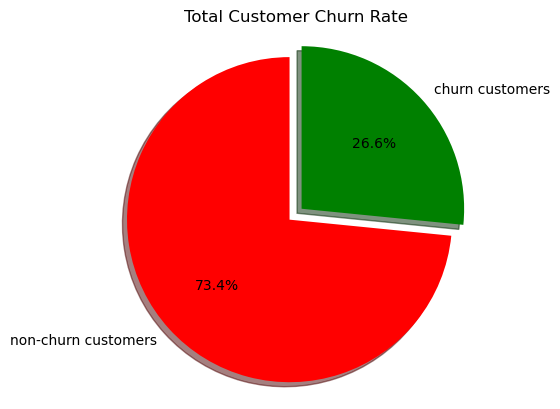

In [82]:
#creating the pie chart to show churn vs non-churn rate based on Contract Type Data
labels = ["non-churn customers", "churn customers"]
customers = [No,Yes]
colors = ["red","green"]
explode = (0,0.1)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(customers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Total Customer Churn Rate")
plt.axis('equal')
plt.savefig("Plot/Total Customer Churn Rate.png")
plt.show()

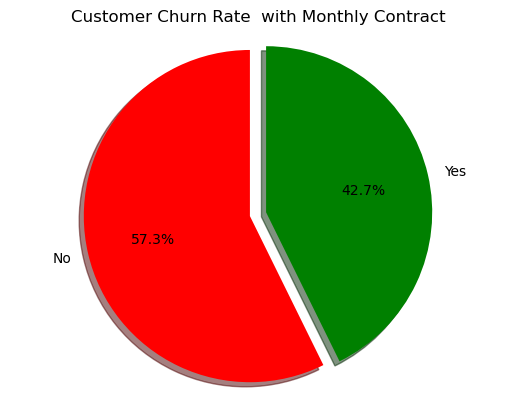

In [84]:
#creating the pie chart to show churn of customers with monthly contract
#Filter data for 'Monthly' contract type
#yes - churn customers, no - non-churn customers

Monthly = churn_counts[churn_counts['Contract Type'] == 'Monthly']
labels = Monthly['Churn']  
customers = Monthly['count']
colors = ['red', 'green']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Customer Churn Rate  with Monthly Contract")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Plot/Customer Churn Rate  with Monthly Contract.png")
plt.show()

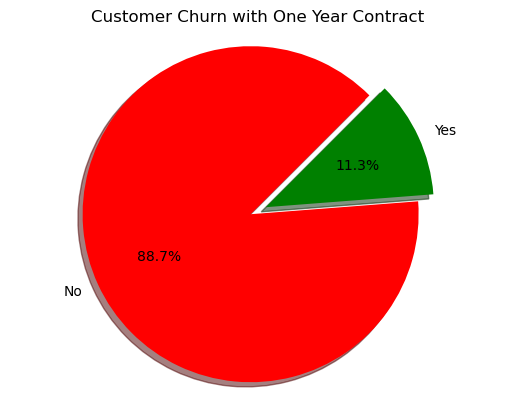

In [86]:
#create the pie chart to show churn of  customers with one year contract
#Filter data for 'One year' contract type
#yes - churn customers, no - non-churn customers

one_year = churn_counts[churn_counts['Contract Type'] == 'One year']
labels = one_year['Churn']  
customers = one_year['count']
colors = ['red', 'green']
explode = (0,0.1)   

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Customer Churn with One Year Contract")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Plot/Customer Churn Rate  with One Year Contract.png")
plt.show()

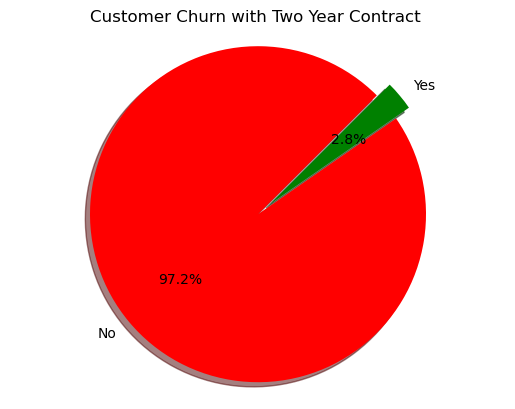

In [92]:
#creating the pie chart to show churn of  customers with two year contract
#Filter data for 'Monthly' contract type
#yes - churn customers, no - non-churn customers

two_year = churn_counts[churn_counts['Contract Type'] == 'Two year']
labels = two_year['Churn']  
customers = two_year['count']
colors = ['red', 'green']
explode = (0,0.1) 

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Customer Churn with Two Year Contract ")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Plot/Customer Churn Rate  with Two Year Contract.png")
plt.show()

In [136]:
#counting the  churn rate by Contract Type
#convert the decimal to percent
contract_type_churn_rate =data_churn.groupby('Contract Type')['Churn'].value_counts(normalize=True).unstack()
contract_type_churn_rate['No'] = contract_type_churn_rate['No']*100
contract_type_churn_rate['Yes'] = contract_type_churn_rate['Yes']*100
contract_type_churn_rate

Churn,No,Yes
Contract Type,,
Monthly,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


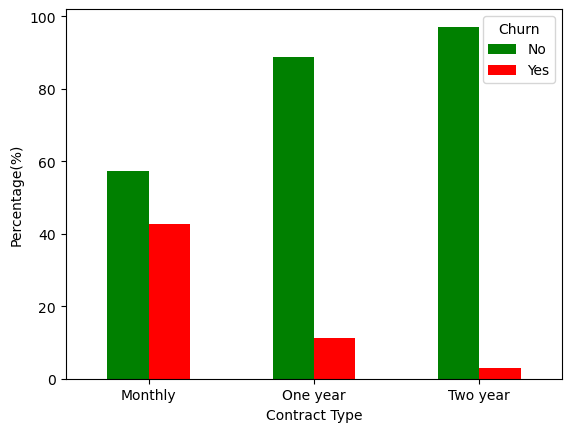

In [149]:
contract_type_churn_rate.plot(kind="bar", ylabel ='Percentage(%)', xlabel='Contract Type', color =['green', 'red'],rot=0)
plt.savefig("Plot/Contract Type Churn Rate.png")

In [153]:
# Calculate Pearson correlation

# To calculate correlation, we need numerical values for Contract Type
contract_type_churn_rate['Contract Type'] = contract_type_churn_rate['Contract Type'].map({'Monthly': 0, 'One year': 1, 'Two year': 2})

# Calculate Pearson correlation
correlation, p_value = pearsonr(contract_type_churn_rate['Contract Type'], contract_type_churn_rate['Yes'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

KeyError: 'Contract Type'

In [146]:
#Checking the correlation - #used Co-pilot  for the coding to convert Contract Type and Churn to numeric values in order to find the correlation using pearson
# Label encode 'Contract Type'
label_encoder = LabelEncoder()
contract_type_churn_rate['Contract Type'] = label_encoder.fit_transform(contract_type_churn_rate['Contract Type'])

# Encode 'Churn' as numerical (Yes=1, No=0)
contract_type_churn_rate['Churn'] = contract_type_churn_rate['Churn'].map({'Yes': 1, 'No': 0})

# Check for constant data to check 'NAN"error
print(contract_type_churn_rate['Contract Type'].unique())
print(contract_type_churn_rate['Churn'].unique())

# Check for missing values to check 'NAN' error
print(contract_type_churn_rate.isna().sum())

# Verify data
print(contract_type_churn_rate.head())

# Calculate Pearson correlation
correlation, p_value = pearsonr(contract_type_churn_rate['Contract Type'], contract_type_churn_rate['Churn'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


KeyError: 'Contract Type'

In [ ]:
#Conclusion: The statement Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts is correct

In [ ]:
#df_contract_type['proportion'] = df_contract_type['proportion'].round(decimals=4)
#print(df_contract_type)

In [ ]:
##drop the index column since it is a duplicate
#contract_type= contract_type.drop(columns=['index'])
#contract_type

In [ ]:
#What factors lead to customer Churn in Telecom Industry?  


#Which factor is positively correlated to the Churn? 


#How can a Telecom industry retain customers in the future? 